In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import warnings

In [10]:
df = pd.read_csv('/content/ data/StudentsPerformance.csv')

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


We will be predicting reading score of student so that becomes our dependent feature.

All the other features will be dependent feature

In [12]:
y = df['reading score']
y

,reading score
0,72
1,90
2,95
3,57
4,78
5,83
6,95
7,43
8,64
9,60


In [13]:
X = df.drop(columns = ['reading score'], axis=1)
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,69,88
2,female,group B,master's degree,standard,none,90,93
3,male,group A,associate's degree,free/reduced,none,47,44
4,male,group C,some college,standard,none,76,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,95
996,male,group C,high school,free/reduced,none,62,55
997,female,group C,high school,free/reduced,completed,59,65
998,female,group D,some college,standard,completed,68,77


In [21]:
#categorical and numerical features
categorical_features = X.select_dtypes(include = 'object').columns.to_list()
numerical_features = X.select_dtypes(include = 'int64').columns.to_list()

In [22]:
for feature in categorical_features:
  print(feature, "--> ",df[feature].unique())

gender -->  ['female' 'male']
race/ethnicity -->  ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education -->  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch -->  ['standard' 'free/reduced']
test preparation course -->  ['none' 'completed']


In [23]:
#we will create a transformer that will perform encoding and scaling

In [24]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,categorical_features),
        ("StandardScaler",numeric_transformer,numerical_features)
    ]
)

In [25]:
X = preprocessor.fit_transform(X)

In [26]:
X.shape

(1000, 19)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((800, 19), (200, 19))

#Function to evaluate our model and give metrics

In [28]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [29]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 3.8715
- Mean Absolute Error: 3.1218
- R2 Score: 0.9282
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.3056
- Mean Absolute Error: 3.4877
- R2 Score: 0.9181


Lasso
Model performance for Training set
- Root Mean Squared Error: 4.2215
- Mean Absolute Error: 3.4220
- R2 Score: 0.9147
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.6350
- Mean Absolute Error: 3.6941
- R2 Score: 0.9051


Ridge
Model performance for Training set
- Root Mean Squared Error: 3.8720
- Mean Absolute Error: 3.1221
- R2 Score: 0.9282
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.3028
- Mean Absolute Error: 3.4861
- R2 Score: 0.9182


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4.8048
- Mean Absolute Error: 3.7448
- R2 Score: 0.8895
-----------------------

#Results

In [30]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
2,Ridge,0.918184
0,Linear Regression,0.918075
5,Random Forest Regressor,0.912373
7,CatBoosting Regressor,0.907223
1,Lasso,0.905059
8,AdaBoost Regressor,0.903640
6,XGBRegressor,0.896433
3,K-Neighbors Regressor,0.836696
4,Decision Tree,0.835119


In [31]:
#Ridge regression has performed the best
ridge_model = Ridge(fit_intercept=True)
ridge_model = ridge_model.fit(x_train, y_train)
y_pred = ridge_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 91.82


Text(0, 0.5, 'Predicted')

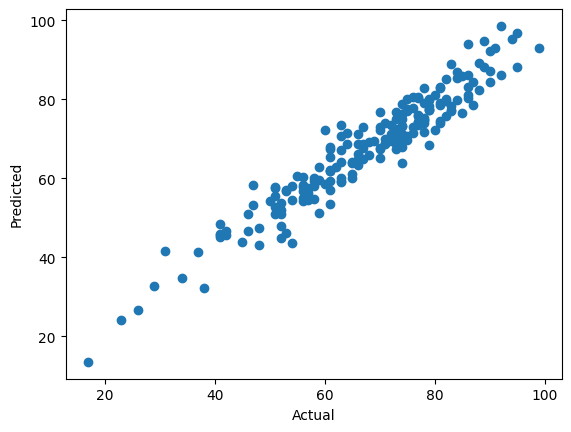

In [34]:
#Plot y_pred and y_test
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

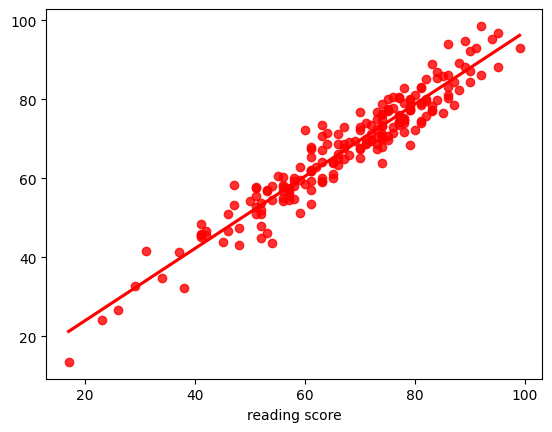

In [35]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#Difference Between Actual and Predicted Values

In [36]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,86,86.255663,-0.255663
737,66,71.312863,-5.312863
740,73,72.391843,0.608157
660,77,75.836583,1.163417
411,83,78.344116,4.655884
...,...,...,...
408,57,56.356759,0.643241
332,56,54.275172,1.724828
208,81,78.562651,2.437349
613,77,74.270701,2.729299
